In [1]:
# Enable automatic import reloading
%load_ext autoreload
%autoreload 2

# Display outputs from all lines when they exist
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # "last"

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

import triadicsim

# Baseline testing

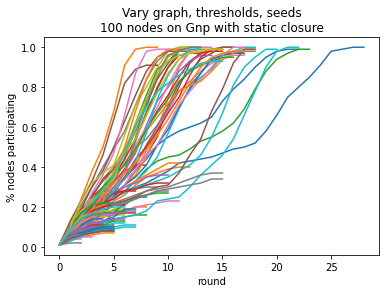

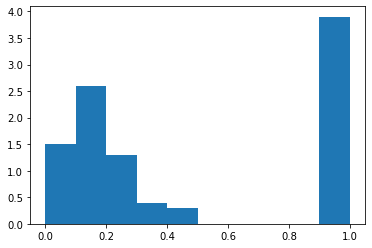

In [2]:
# Generalized, super-hyperparameter-collection version

num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][4] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

# varying graph, varying thresholds, varying seeds
rounds_filled = []
rounds_frozen = []
max_size_round = []
sizes_round = []
for i in range(num_experiments):
    # Initialize simulation inputs
    G = triadicsim.graph(
        num_nodes=num_nodes, 
        graph_type=graph_type, 
        rng_seed=None,
    )
    thresholds = triadicsim.create_thresholds(
        num_nodes, mean=threshold_mean, var=threshold_var,
        rng_seed=None,
    )
    seedset = triadicsim.create_seedset(
        seed_candidates, num_seeds,
        rng_seed=None,
    )
    # Run simulation
    G_log, node_log, edge_log, exit_status = triadicsim.simulate_cascade(
        G, thresholds, seedset,
        use_network=use_network, sticky_cascade=sticky_cascade,
        closure_type=closure_method, closure_rate=closure_rate,
        max_rounds=max_rounds,
        rng_seed=None,
    )
    # Compute history of infection rates
    num_reached_nodes = [len(s) for s in node_log]
    rounds_filled.append(1 if exit_status[0] else 0)
    rounds_frozen.append(1 if exit_status[1] else 0)
    max_size_round.append([
        i for i in range(len(num_reached_nodes)) 
        if num_reached_nodes[i]==max(num_reached_nodes)
    ][0])
    sizes_round.append([x/num_nodes for x in num_reached_nodes])
    # Plot the output
    _ = plt.plot([x/num_nodes for x in num_reached_nodes])
_ = plt.xlabel('round')
_ = plt.ylabel('% nodes participating')
_ = plt.title(
    'Vary graph, thresholds, seeds\n'
    + f'{num_nodes} nodes on {graph_type} with {closure_method} closure'
)
plt.show()

# print(rounds_filled)
# print(rounds_frozen)
# print(max_size_round)
_ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
plt.show()

In [3]:
import pickle

# Separate the general test func out into method
def run_simulations(
    num_experiments, graph_type, num_nodes, graph_params, 
    threshold_mean, threshold_var, seed_candidates, num_seeds, 
    use_network, sticky_cascade, closure_method, closure_rate, 
    max_rounds, save_path=None):
    sim_log = []
    rounds_filled = []
    rounds_frozen = []
    max_size_round = []
    sizes_round = []
    for i in range(num_experiments):
        # Initialize simulation inputs
        G = triadicsim.graph(
            num_nodes=num_nodes, 
            graph_type=graph_type, 
            rng_seed=None,
        )
        thresholds = triadicsim.create_thresholds(
            num_nodes, mean=threshold_mean, var=threshold_var,
            rng_seed=None,
        )
        seedset = triadicsim.create_seedset(
            seed_candidates, num_seeds,
            rng_seed=None,
        )
        # Run simulation
        G_log, node_log, edge_log, exit_status = triadicsim.simulate_cascade(
            G, thresholds, seedset,
            use_network=use_network, sticky_cascade=sticky_cascade,
            closure_type=closure_method, closure_rate=closure_rate,
            max_rounds=max_rounds,
            rng_seed=None,
        )
        sim_log.append( (G, thresholds, seedset, G_log, node_log, edge_log, exit_status) )
        # Compute history of infection rates
        num_reached_nodes = [len(s) for s in node_log]
        rounds_filled.append(1 if exit_status[0] else 0)
        rounds_frozen.append(1 if exit_status[1] else 0)
        max_size_round.append([
            i for i in range(len(num_reached_nodes)) 
            if num_reached_nodes[i]==max(num_reached_nodes)
        ][0])
        sizes_round.append([x/num_nodes for x in num_reached_nodes])
        # Plot the output
        _ = plt.plot([x/num_nodes for x in num_reached_nodes])
    _ = plt.xlabel('round')
    _ = plt.ylabel('% nodes participating')
    _ = plt.title(
        'Vary graph, thresholds, seeds\n'
        + f'{num_nodes} nodes on {graph_type} with {closure_method} closure'
    )
    plt.show()
    # Save results and log data
    with open(save_path, 'wb') as f:
       pickle.dump(
           (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round),
           f
       )
    return rounds_filled, rounds_frozen, max_size_round, sizes_round

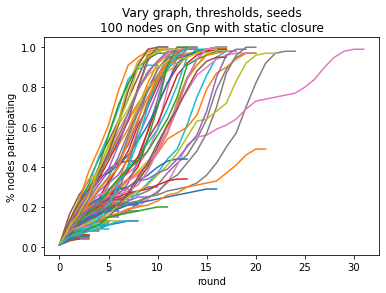

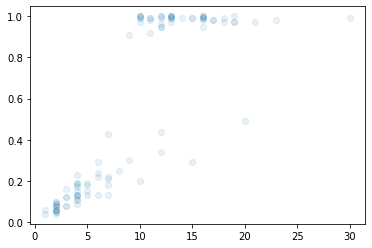

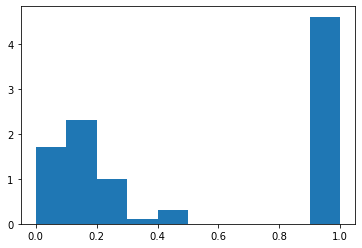

In [4]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][4] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

rounds_filled, rounds_frozen, max_size_round, sizes_round = run_simulations(
    num_experiments, graph_type, num_nodes, graph_params, 
    threshold_mean, threshold_var, seed_candidates, num_seeds, 
    use_network, sticky_cascade, closure_method, closure_rate, 
    max_rounds, save_path='temp.pkl',
)

# print(rounds_filled)
# print(rounds_frozen)
# print(max_size_round)

_ = plt.scatter(
    max_size_round,
    [r[-1] for r in sizes_round],
    alpha=0.1,
)
plt.show()

_ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
plt.show()

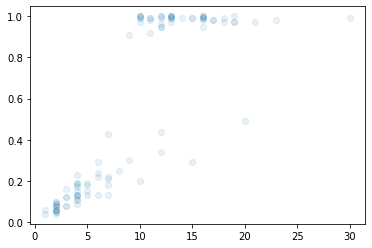

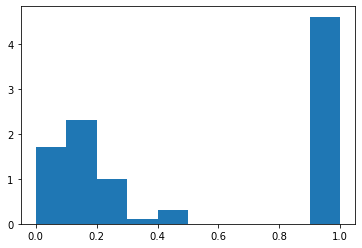

In [5]:
# Check backup
(sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
    open('temp.pkl', 'rb')
)

_ = plt.scatter(
    max_size_round,
    [r[-1] for r in sizes_round],
    alpha=0.1,
)
plt.show()

_ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
plt.show()

# Compare the impact that different threshold and closure hyperparameters have on cascades in triadic closure network models with Gnp graphs

## Graph (100 nodes 0.1 p) Threshold (X mean 0.25 var) Seed (1) Closure (Max 1) ; X ranging from 0.1 to 0.9 incremental 0.1

Now running simulation for threshold=0.1


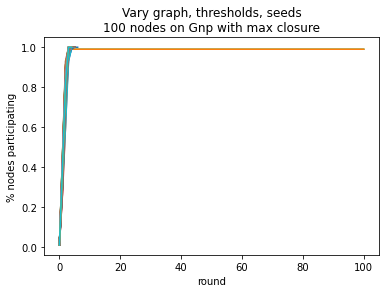

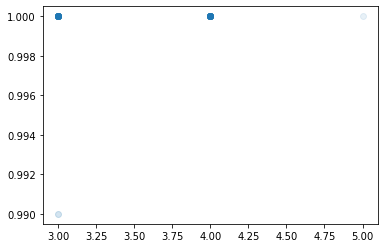

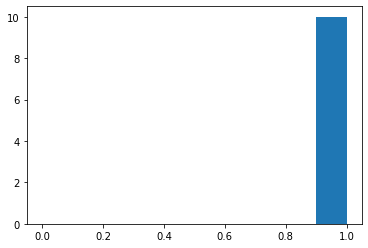

Now running simulation for threshold=0.2


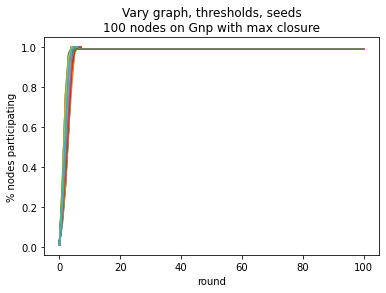

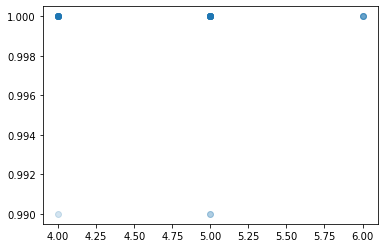

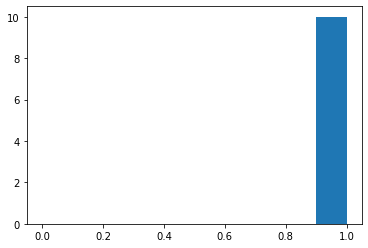

Now running simulation for threshold=0.3


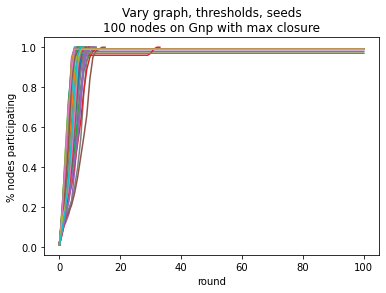

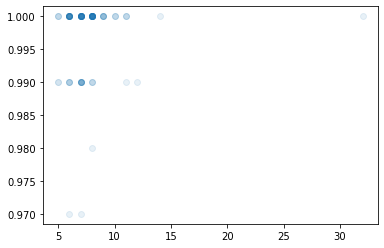

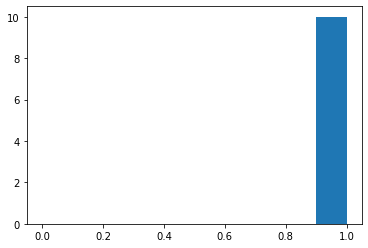

Now running simulation for threshold=0.4


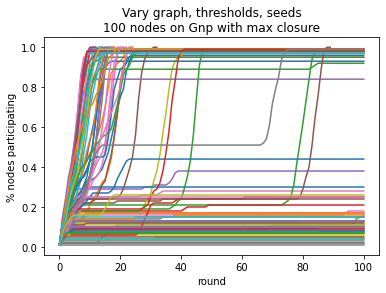

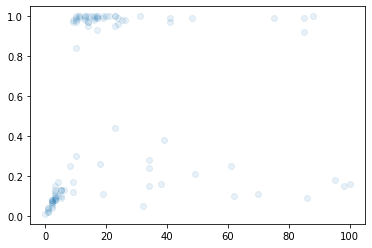

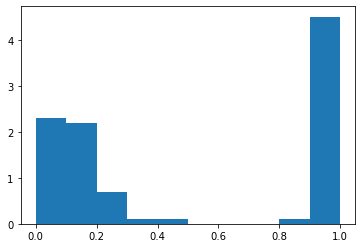

Now running simulation for threshold=0.5


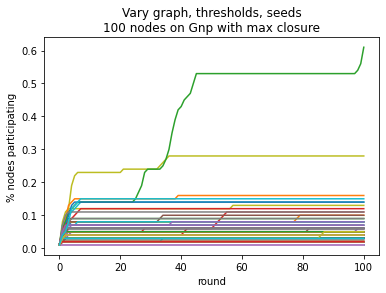

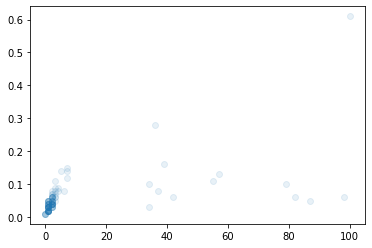

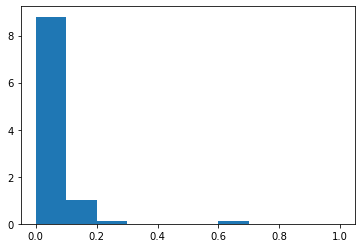

Now running simulation for threshold=0.6


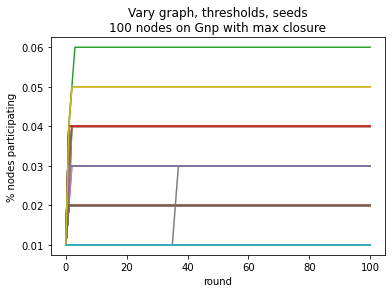

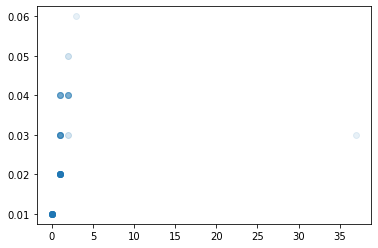

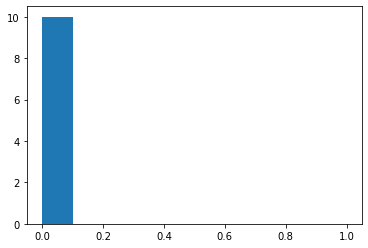

Now running simulation for threshold=0.7


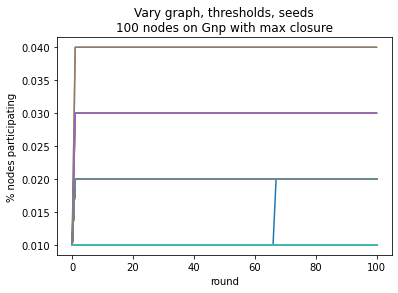

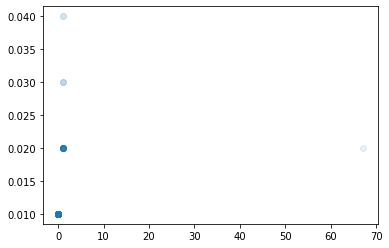

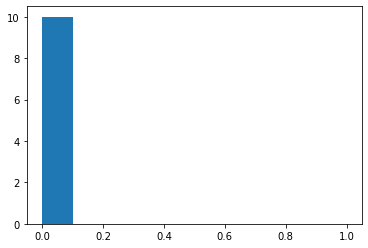

Now running simulation for threshold=0.8


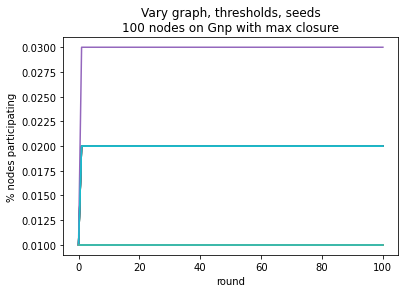

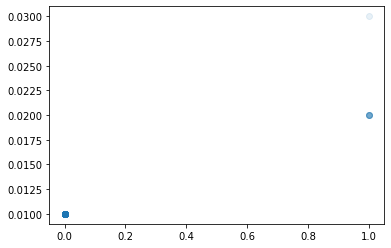

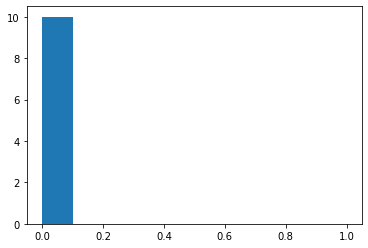

Now running simulation for threshold=0.9


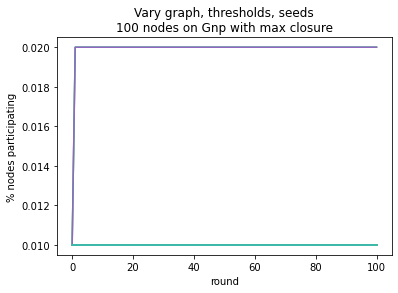

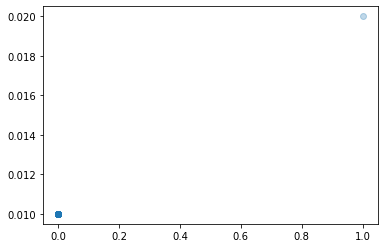

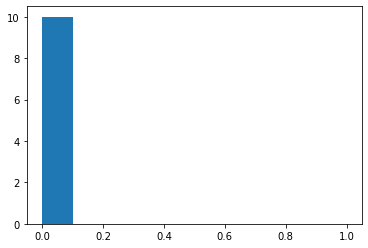

In [6]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
THRESHOLD_MEAN_LIST = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][0] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

for threshold_mean in THRESHOLD_MEAN_LIST:
    print(f'Now running simulation for threshold={threshold_mean}')
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_simulations(
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelmax_threshold{threshold_mean}.pkl',
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (Static)

In [7]:
import pickle

# Do the simulation thing EXCEPT take a given sim log simulation inputs to work with
def run_identicalsrc_simulations(
    prev_simlog,
    num_experiments, graph_type, num_nodes, graph_params, 
    threshold_mean, threshold_var, seed_candidates, num_seeds, 
    use_network, sticky_cascade, closure_method, closure_rate, 
    max_rounds, save_path=None, 
    use_simlog_graph=False, use_simlog_thresholds=False, use_simlog_seeds=False):
    if prev_simlog is not None and len(prev_simlog)<num_experiments:
        raise ValueError('prev_simlog is shorter than requested experiment count')
    sim_log = []
    rounds_filled = []
    rounds_frozen = []
    max_size_round = []
    sizes_round = []
    for i in range(num_experiments):
        # Retrieve previous simlog data
        (
            prev_G, prev_thresholds, prev_seedset, 
            prev_G_log, prev_node_log, prev_edge_log, prev_exit_status
        ) = prev_simlog[i]
        # Initialize simulation inputs
        if use_simlog_graph:
            G = prev_G
        else:
            G = triadicsim.graph(
                num_nodes=num_nodes, 
                graph_type=graph_type, 
                rng_seed=None,
            )
        if use_simlog_thresholds:
            thresholds = prev_thresholds
        else:
            thresholds = triadicsim.create_thresholds(
                num_nodes, mean=threshold_mean, var=threshold_var,
                rng_seed=None,
            )
        if use_simlog_seeds:
            seedset = prev_seedset
        else:
            seedset = triadicsim.create_seedset(
                seed_candidates, num_seeds,
                rng_seed=None,
            )
        # Run simulation
        G_log, node_log, edge_log, exit_status = triadicsim.simulate_cascade(
            G, thresholds, seedset,
            use_network=use_network, sticky_cascade=sticky_cascade,
            closure_type=closure_method, closure_rate=closure_rate,
            max_rounds=max_rounds,
            rng_seed=None,
        )
        sim_log.append( (G, thresholds, seedset, G_log, node_log, edge_log, exit_status) )
        # Compute history of infection rates
        num_reached_nodes = [len(s) for s in node_log]
        rounds_filled.append(1 if exit_status[0] else 0)
        rounds_frozen.append(1 if exit_status[1] else 0)
        max_size_round.append([
            i for i in range(len(num_reached_nodes)) 
            if num_reached_nodes[i]==max(num_reached_nodes)
        ][0])
        sizes_round.append([x/num_nodes for x in num_reached_nodes])
        # Plot the output
        _ = plt.plot([x/num_nodes for x in num_reached_nodes])
    _ = plt.xlabel('round')
    _ = plt.ylabel('% nodes participating')
    _ = plt.title(
        'Vary graph, thresholds, seeds\n'
        + f'{num_nodes} nodes on {graph_type} with {closure_method} closure'
    )
    plt.show()
    # Save results and log data
    with open(save_path, 'wb') as f:
       pickle.dump(
           (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round),
           f
       )
    return rounds_filled, rounds_frozen, max_size_round, sizes_round

Now running matching static simulations for threshold=0.1


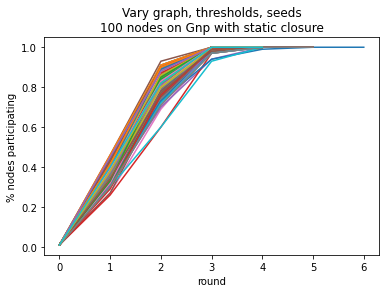

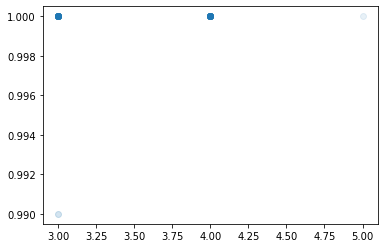

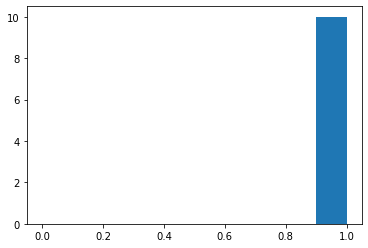

Now running matching static simulations for threshold=0.2


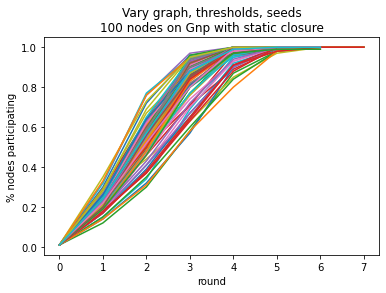

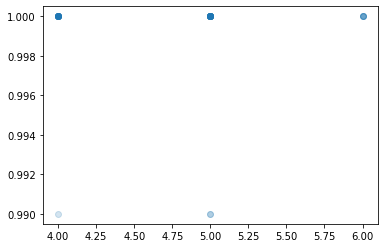

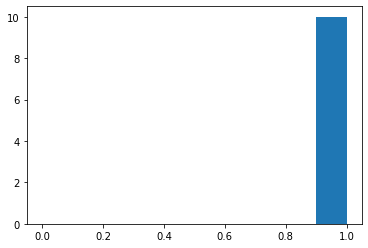

Now running matching static simulations for threshold=0.3


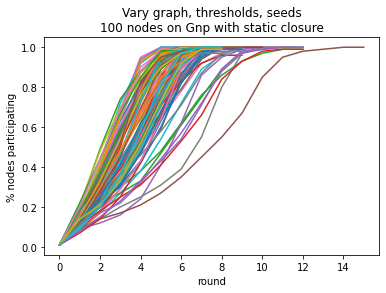

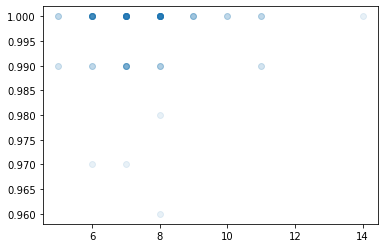

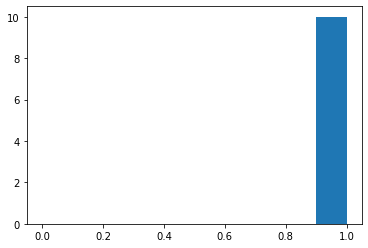

Now running matching static simulations for threshold=0.4


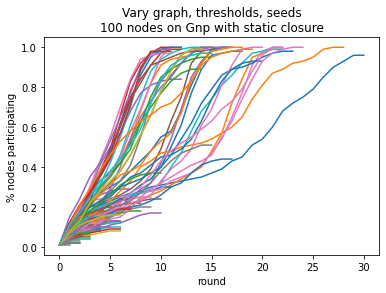

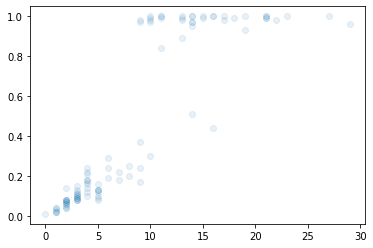

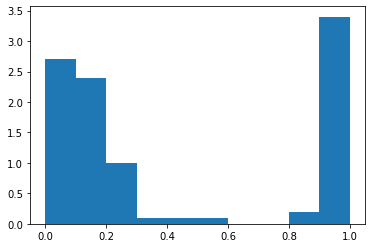

Now running matching static simulations for threshold=0.5


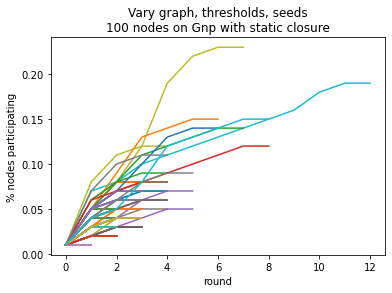

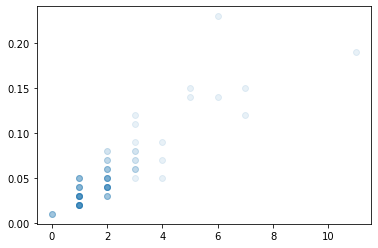

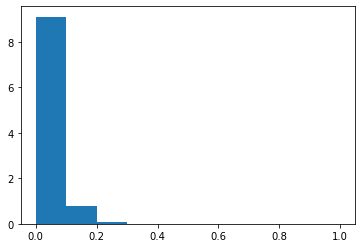

Now running matching static simulations for threshold=0.6


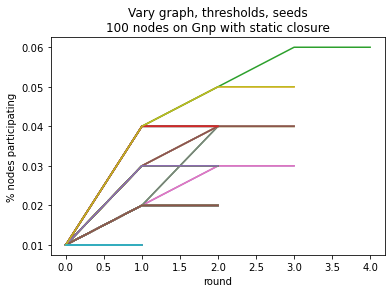

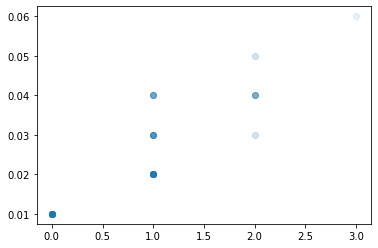

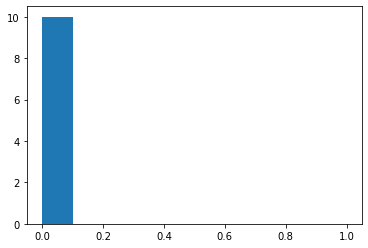

Now running matching static simulations for threshold=0.7


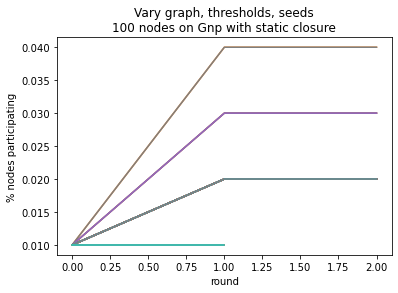

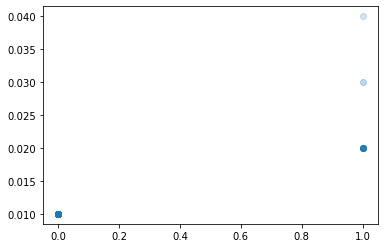

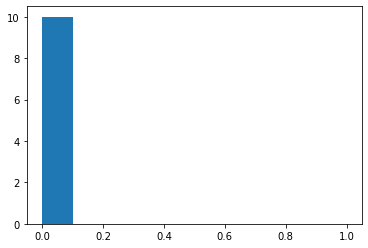

Now running matching static simulations for threshold=0.8


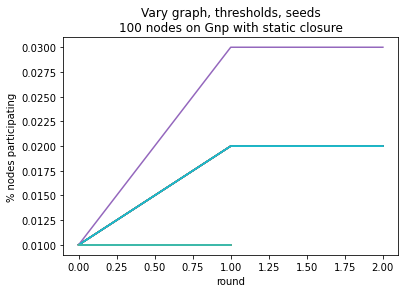

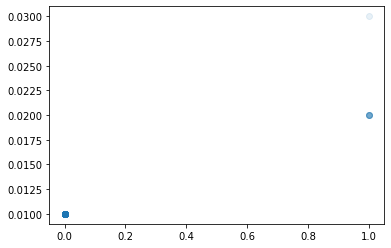

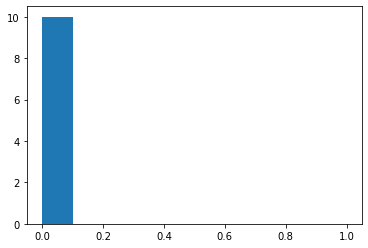

Now running matching static simulations for threshold=0.9


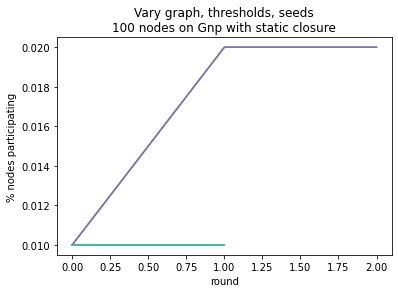

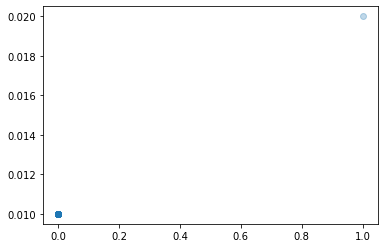

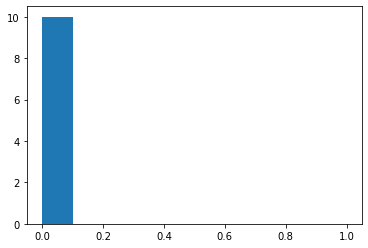

In [8]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
THRESHOLD_MEAN_LIST = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][4] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

for threshold_mean in THRESHOLD_MEAN_LIST:
    print(f'Now running matching static simulations for threshold={threshold_mean}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_threshold{threshold_mean}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelstatic_threshold{threshold_mean}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (None/Population)

Now running matching static simulations for threshold=0.1


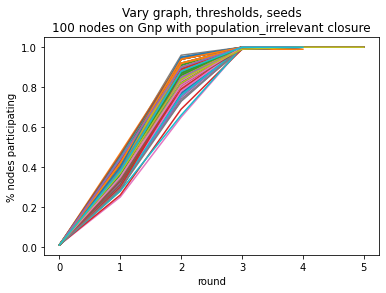

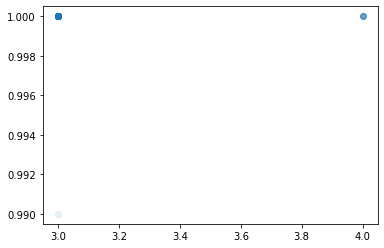

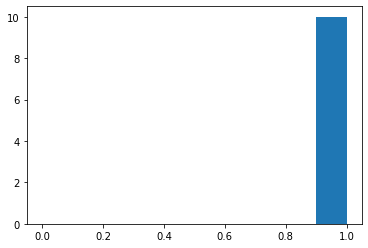

Now running matching static simulations for threshold=0.2


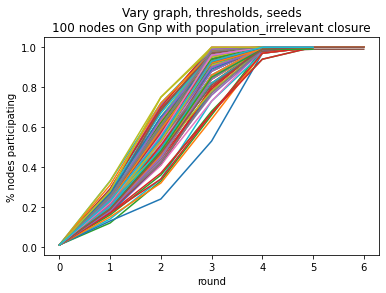

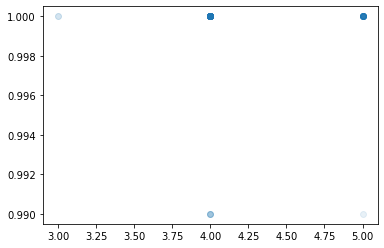

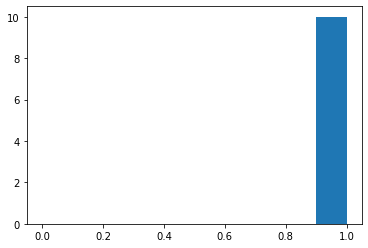

Now running matching static simulations for threshold=0.3


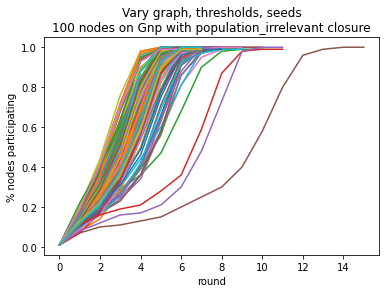

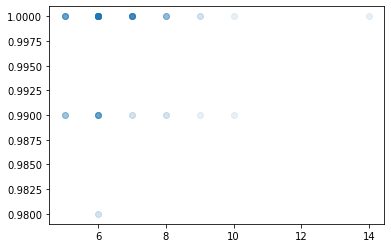

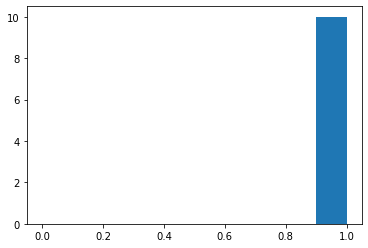

Now running matching static simulations for threshold=0.4


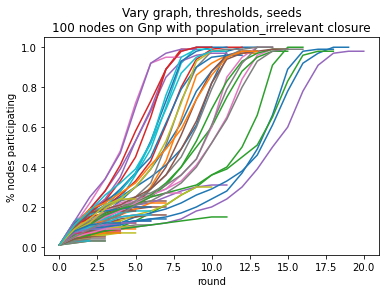

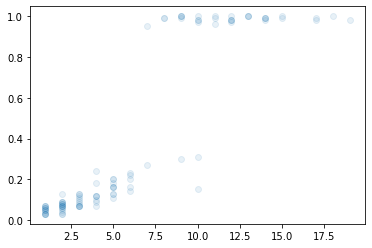

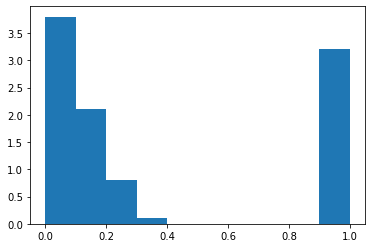

Now running matching static simulations for threshold=0.5


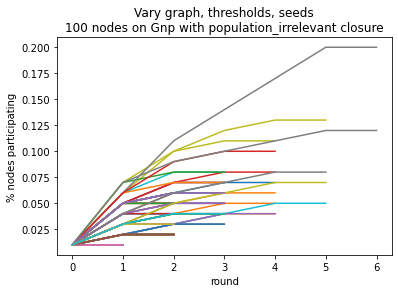

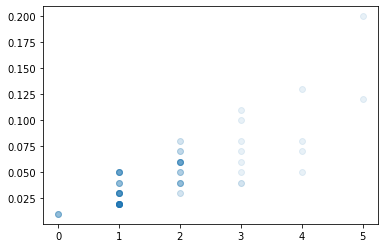

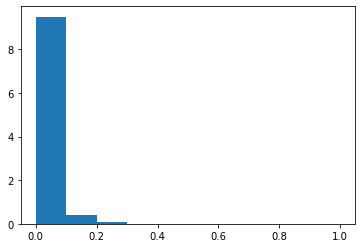

Now running matching static simulations for threshold=0.6


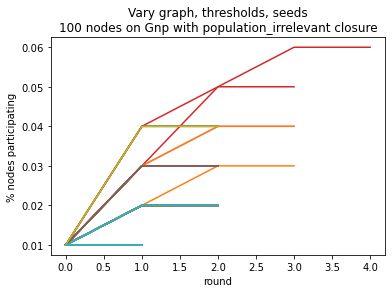

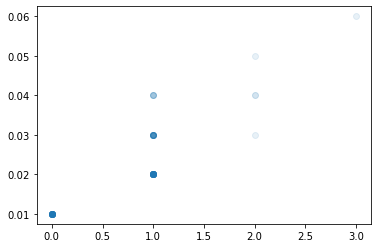

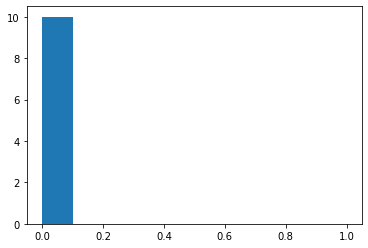

Now running matching static simulations for threshold=0.7


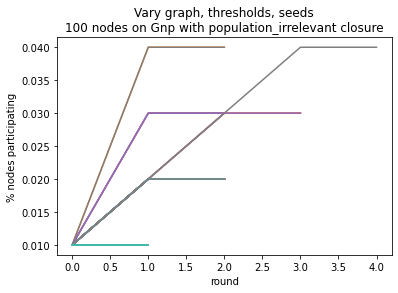

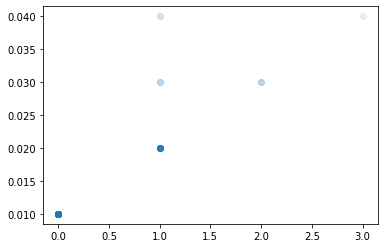

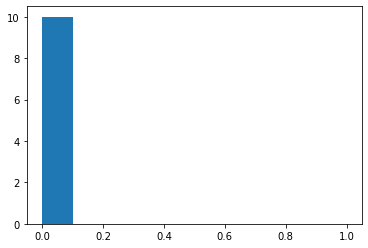

Now running matching static simulations for threshold=0.8


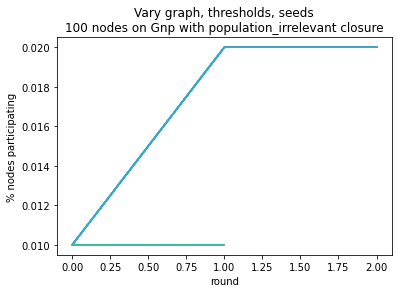

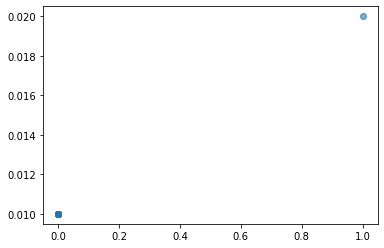

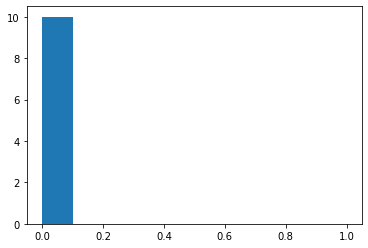

Now running matching static simulations for threshold=0.9


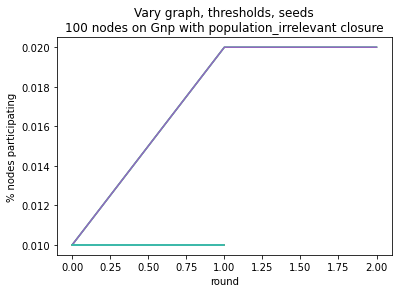

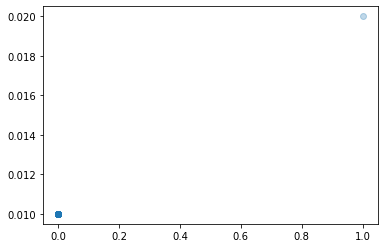

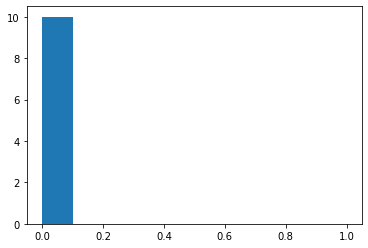

In [9]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
THRESHOLD_MEAN_LIST = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = False
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][5] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

for threshold_mean in THRESHOLD_MEAN_LIST:
    print(f'Now running matching static simulations for threshold={threshold_mean}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_threshold{threshold_mean}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelpop_threshold{threshold_mean}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (Random)

Now running matching static simulations for threshold=0.1


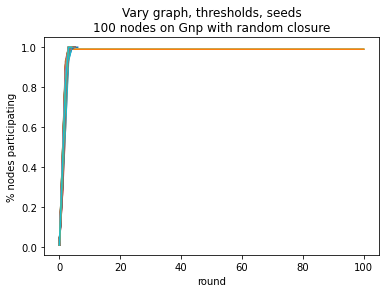

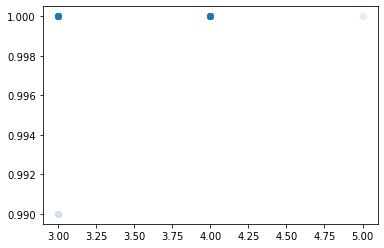

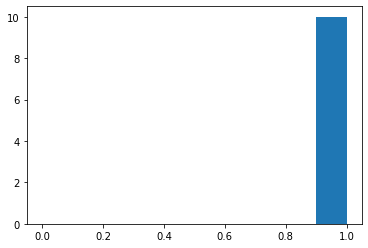

Now running matching static simulations for threshold=0.2


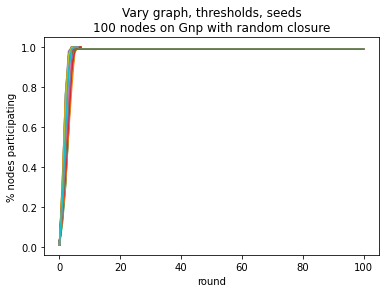

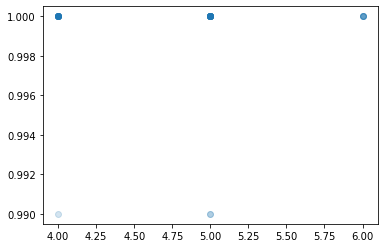

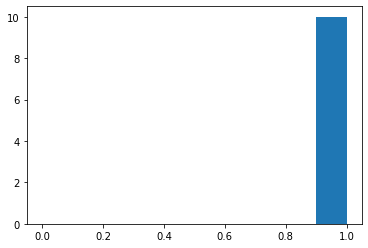

Now running matching static simulations for threshold=0.3


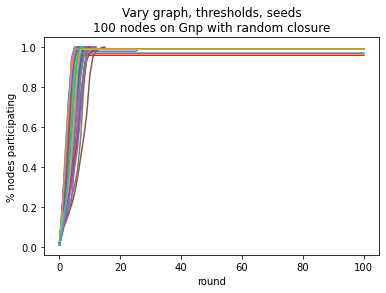

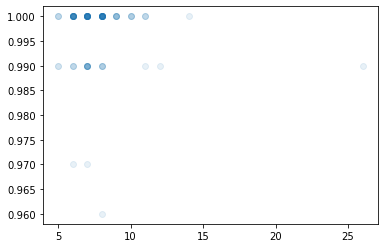

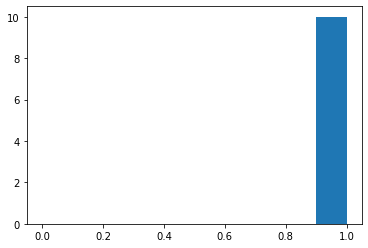

Now running matching static simulations for threshold=0.4


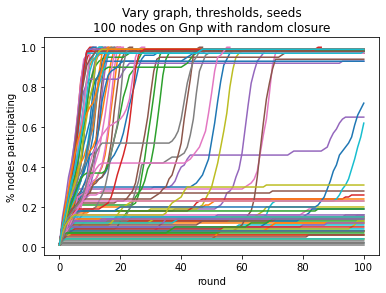

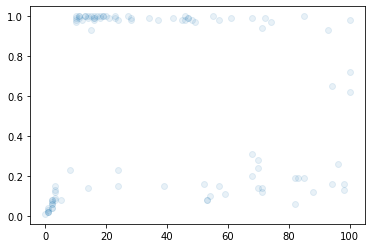

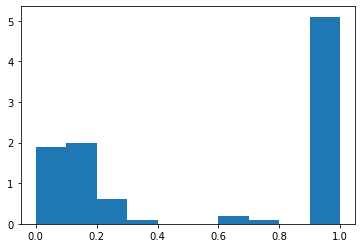

Now running matching static simulations for threshold=0.5


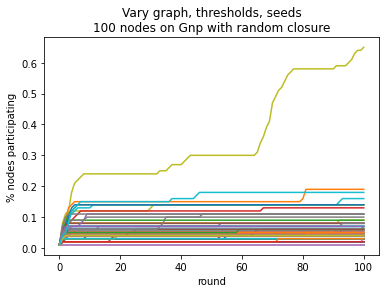

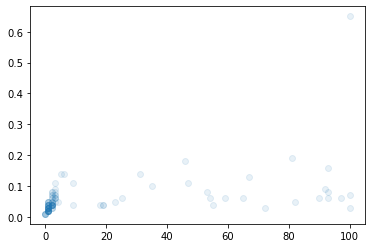

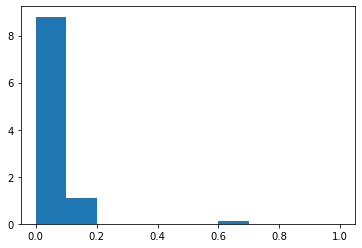

Now running matching static simulations for threshold=0.6


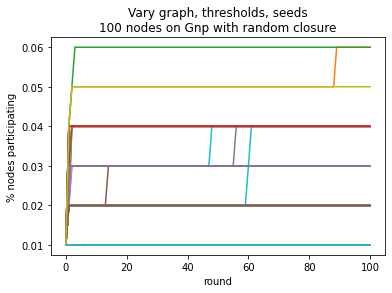

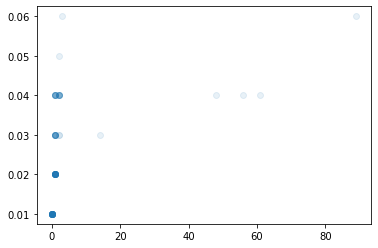

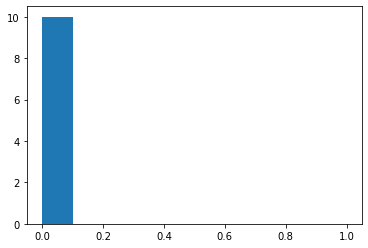

Now running matching static simulations for threshold=0.7


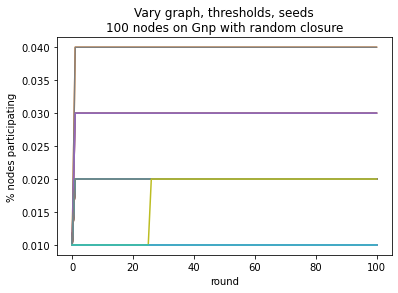

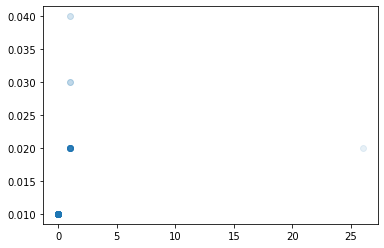

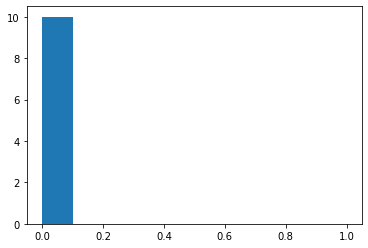

Now running matching static simulations for threshold=0.8


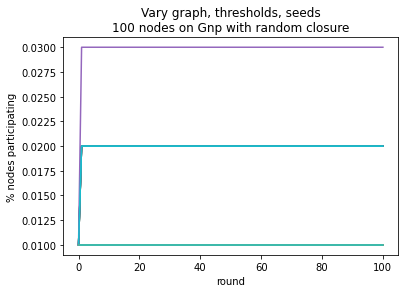

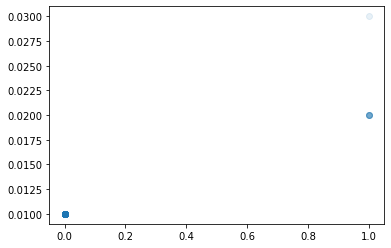

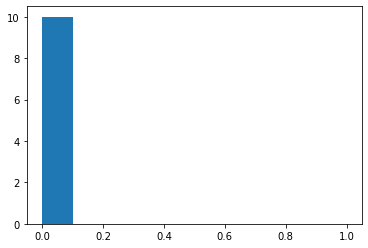

Now running matching static simulations for threshold=0.9


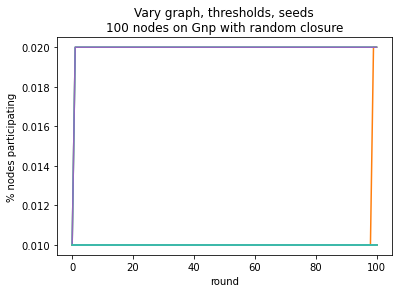

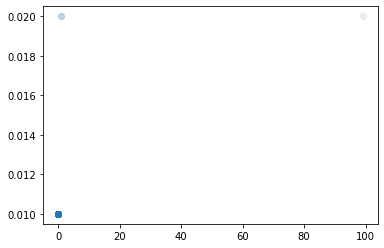

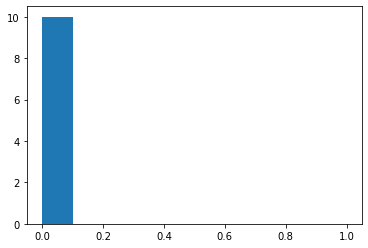

In [10]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
THRESHOLD_MEAN_LIST = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][3] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

for threshold_mean in THRESHOLD_MEAN_LIST:
    print(f'Now running matching static simulations for threshold={threshold_mean}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_threshold{threshold_mean}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelrandom_threshold{threshold_mean}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## Graph (100 nodes 0.1 p) Threshold (0.4 mean X var) Seed (1) Closure (Max 1) ; X ranging from 0.15 to 0.35 incremental 0.05

Now running simulation for thresholdvar=0.15


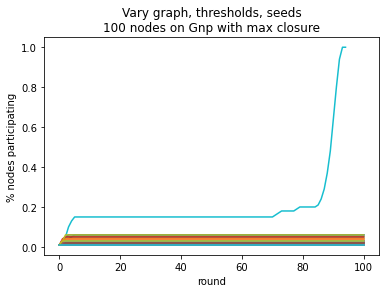

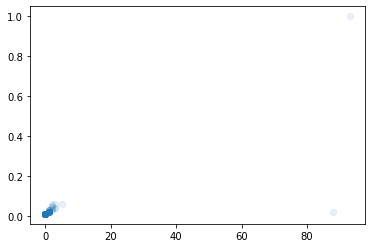

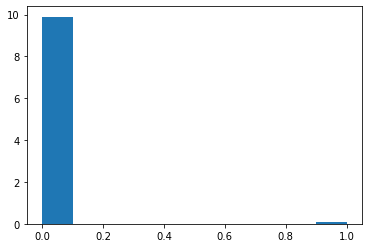

Now running simulation for thresholdvar=0.2


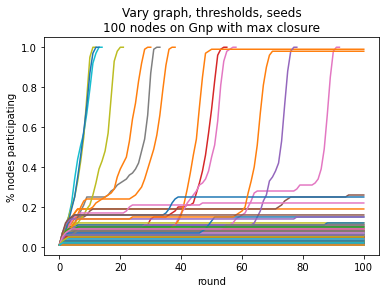

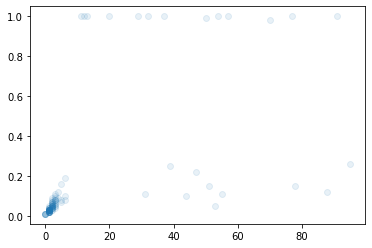

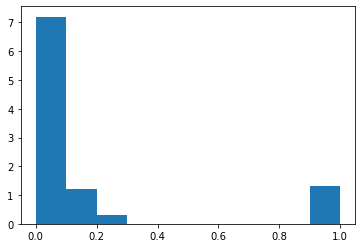

Now running simulation for thresholdvar=0.25


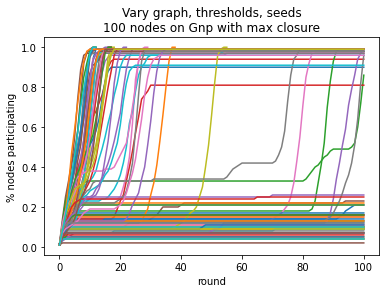

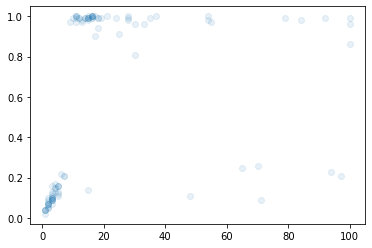

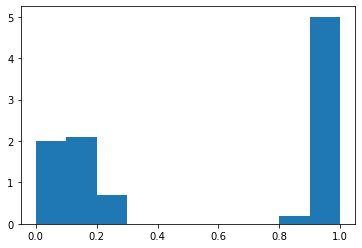

Now running simulation for thresholdvar=0.3


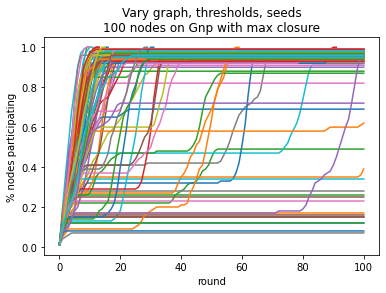

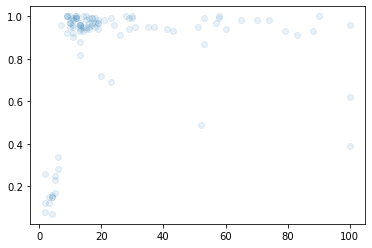

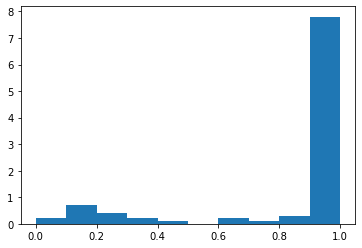

Now running simulation for thresholdvar=0.35


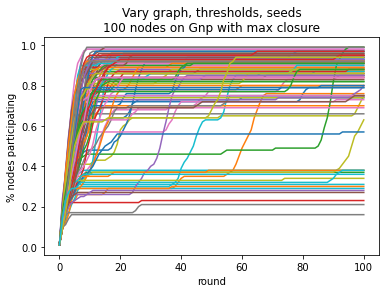

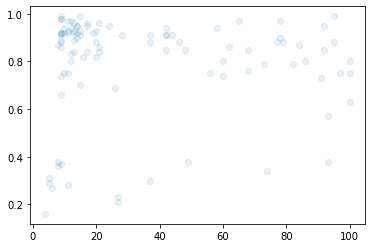

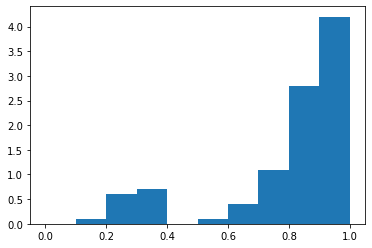

In [11]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
THRESHOLD_VAR_LIST = [0.15, 0.20, 0.25, 0.30, 0.35] # threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][0] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

for threshold_var in THRESHOLD_VAR_LIST:
    print(f'Now running simulation for thresholdvar={threshold_var}')
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_simulations(
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelmax_thresholdvar{threshold_var}.pkl',
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (Static)

Now running simulation for thresholdvar=0.15


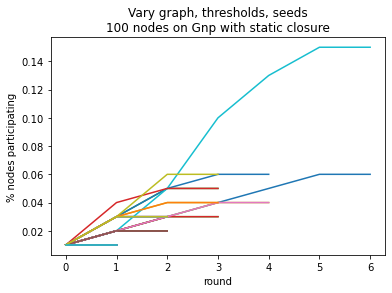

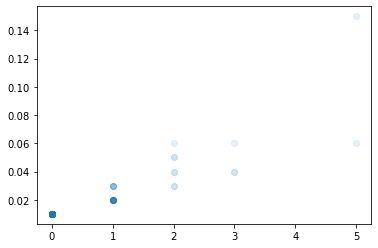

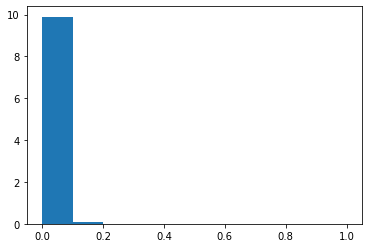

Now running simulation for thresholdvar=0.2


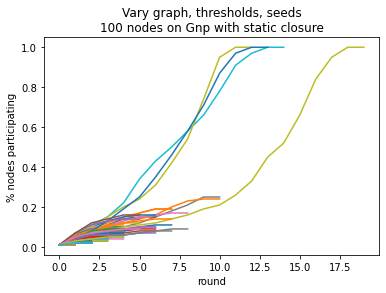

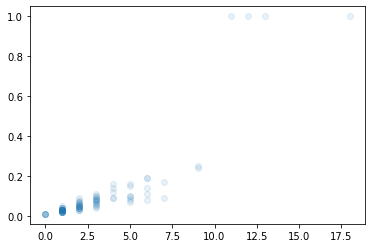

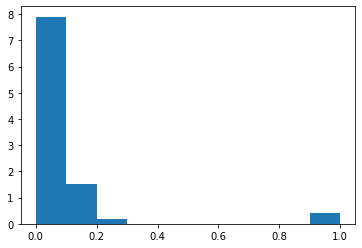

Now running simulation for thresholdvar=0.25


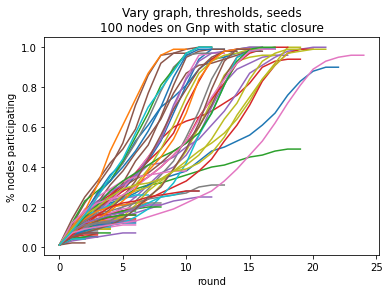

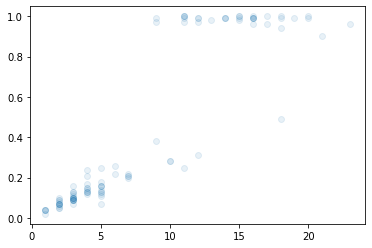

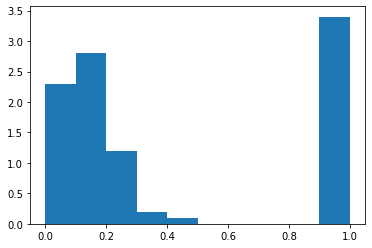

Now running simulation for thresholdvar=0.3


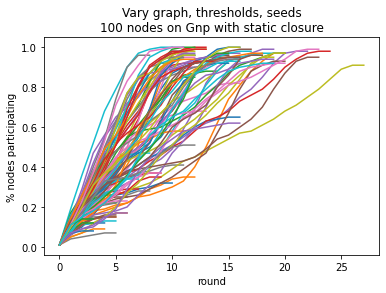

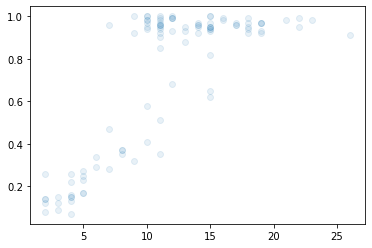

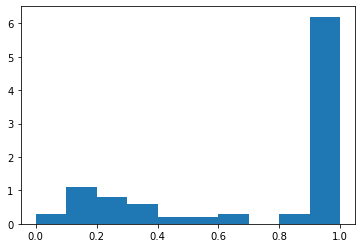

Now running simulation for thresholdvar=0.35


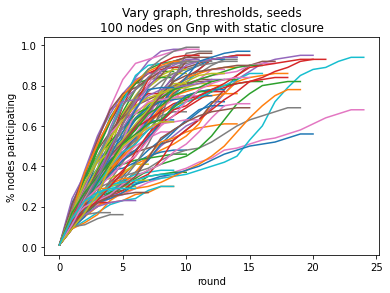

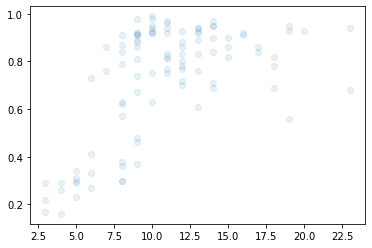

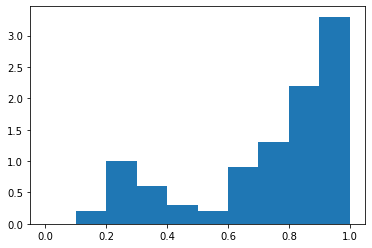

In [12]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
THRESHOLD_VAR_LIST = [0.15, 0.20, 0.25, 0.30, 0.35] # threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][4] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

for threshold_var in THRESHOLD_VAR_LIST:
    print(f'Now running simulation for thresholdvar={threshold_var}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_thresholdvar{threshold_var}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelstatic_thresholdvar{threshold_var}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (None/Population)

Now running simulation for thresholdvar=0.15


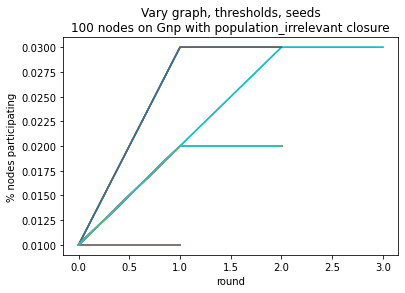

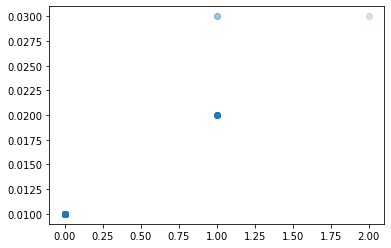

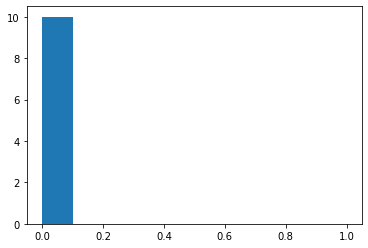

Now running simulation for thresholdvar=0.2


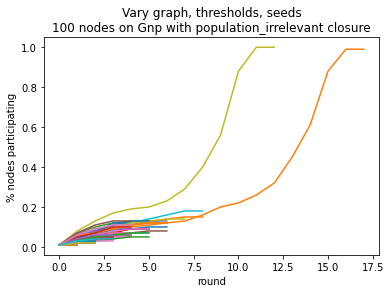

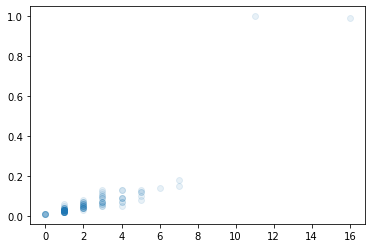

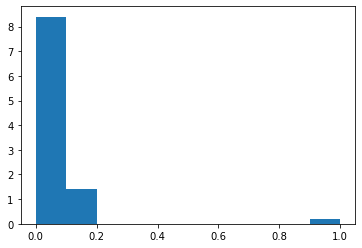

Now running simulation for thresholdvar=0.25


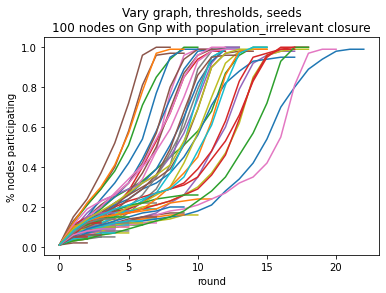

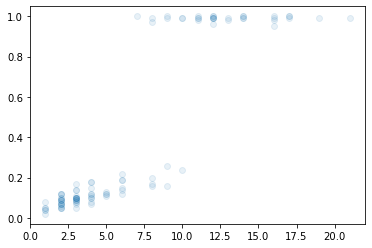

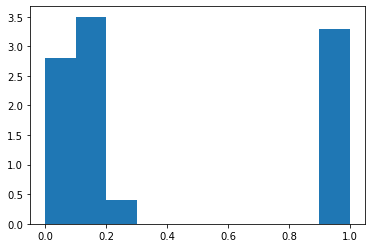

Now running simulation for thresholdvar=0.3


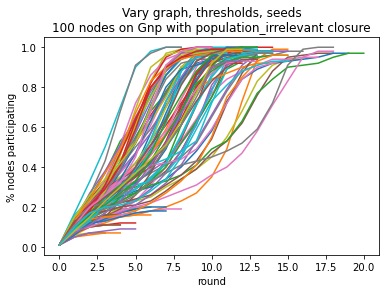

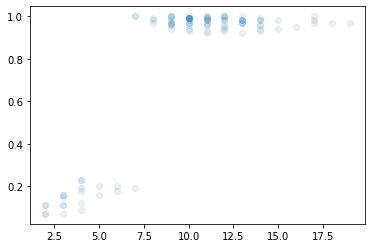

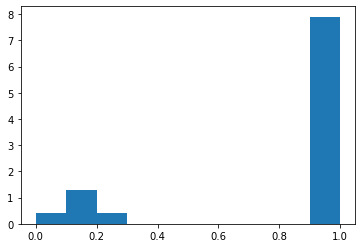

Now running simulation for thresholdvar=0.35


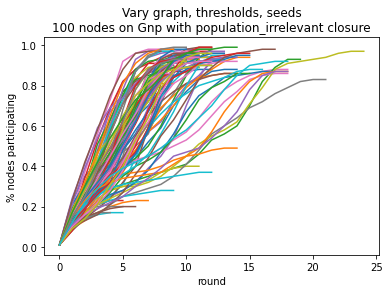

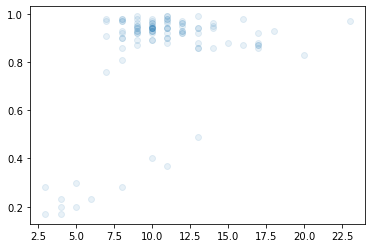

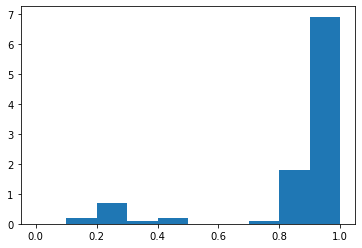

In [13]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
THRESHOLD_VAR_LIST = [0.15, 0.20, 0.25, 0.30, 0.35] # threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = False
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][5] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

for threshold_var in THRESHOLD_VAR_LIST:
    print(f'Now running simulation for thresholdvar={threshold_var}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_thresholdvar{threshold_var}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelpop_thresholdvar{threshold_var}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (Random)

Now running simulation for thresholdvar=0.15


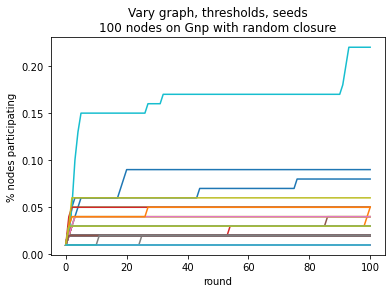

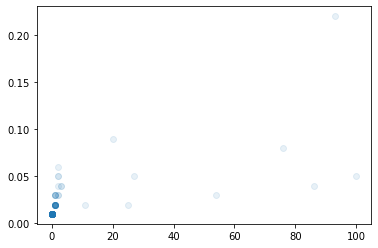

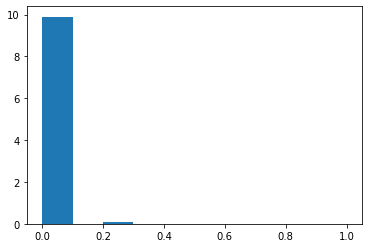

Now running simulation for thresholdvar=0.2


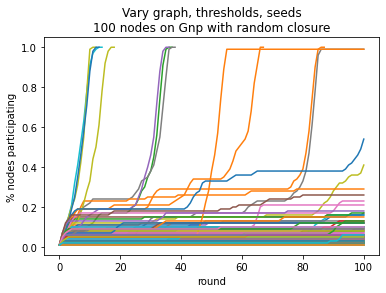

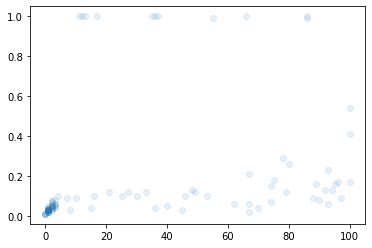

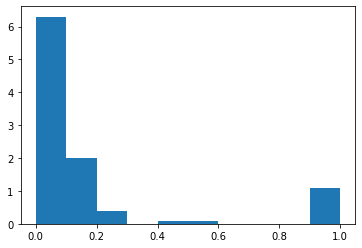

Now running simulation for thresholdvar=0.25


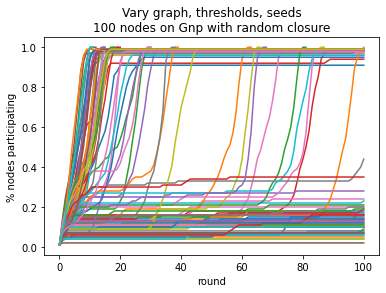

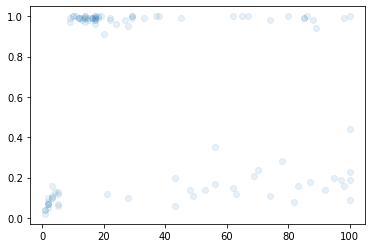

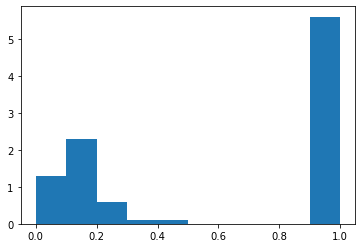

Now running simulation for thresholdvar=0.3


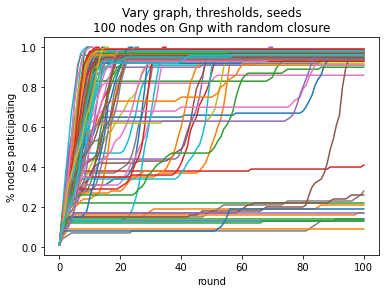

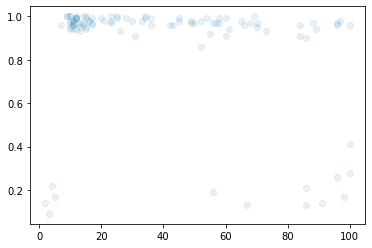

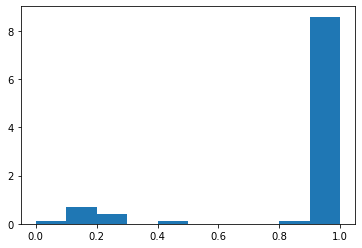

Now running simulation for thresholdvar=0.35


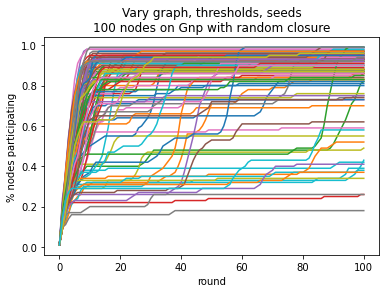

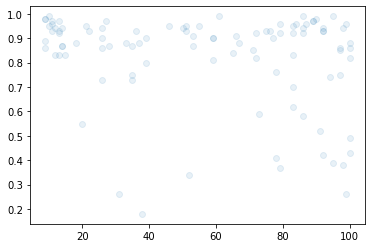

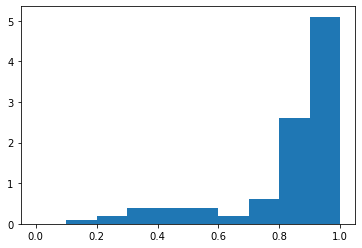

In [14]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
THRESHOLD_VAR_LIST = [0.15, 0.20, 0.25, 0.30, 0.35] # threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][3] if use_network else 'population_irrelevant'
closure_rate = 1
max_rounds = 100

for threshold_var in THRESHOLD_VAR_LIST:
    print(f'Now running simulation for thresholdvar={threshold_var}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_thresholdvar{threshold_var}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelrandom_thresholdvar{threshold_var}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## Graph (100 nodes 0.1 p) Threshold (0.4 mean 0.25 var) Seed (1) Closure (Max X) ; X ranging from 1 to 25 incremental 5

Now running simulation for closure_rate=1


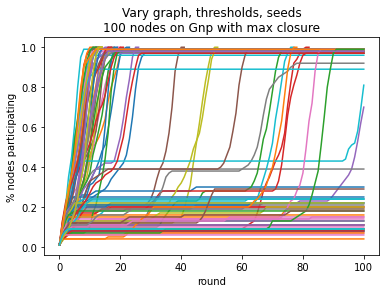

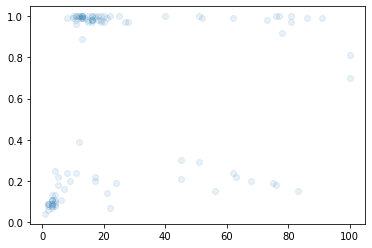

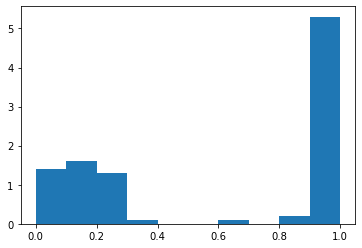

Now running simulation for closure_rate=5


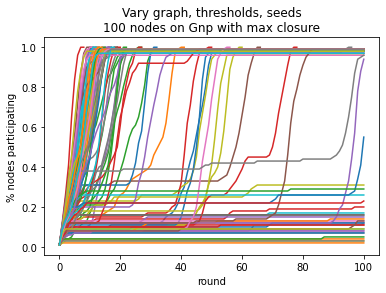

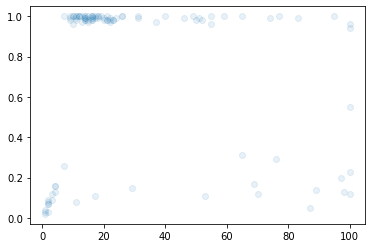

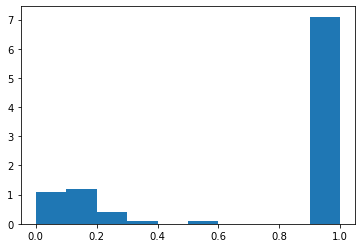

Now running simulation for closure_rate=10


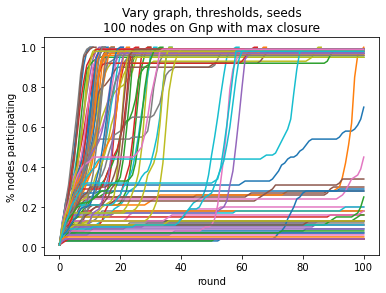

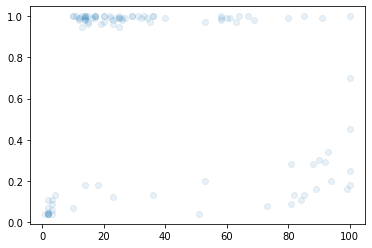

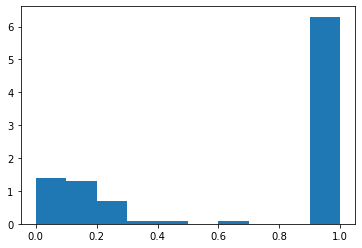

Now running simulation for closure_rate=15


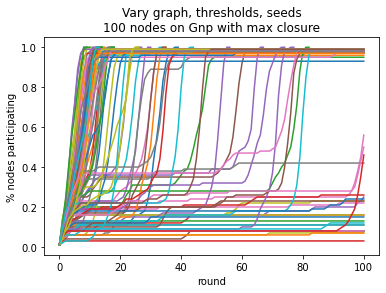

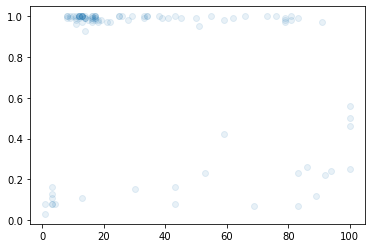

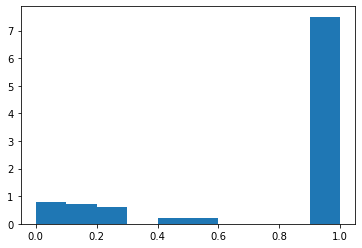

Now running simulation for closure_rate=20


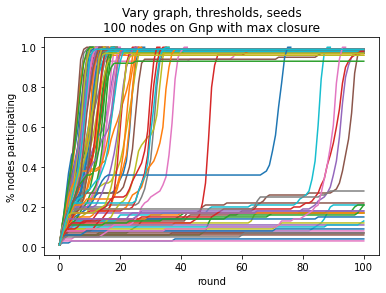

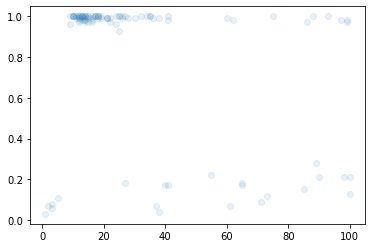

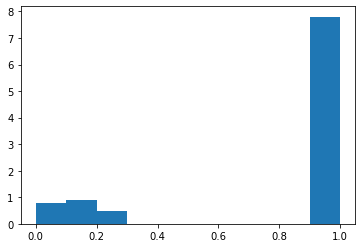

Now running simulation for closure_rate=25


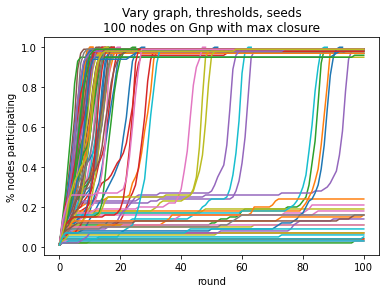

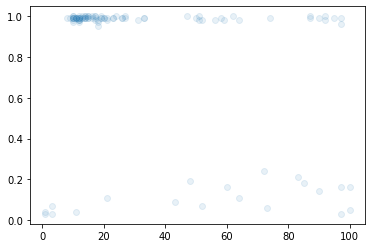

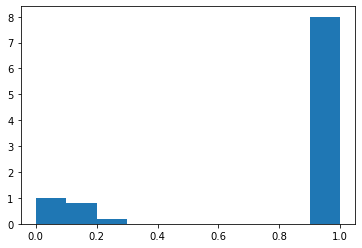

In [15]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][0] if use_network else 'population_irrelevant'
CLOSURE_RATE_LIST = [1, 5, 10, 15, 20, 25] # closure_rate = 1
max_rounds = 100

for closure_rate in CLOSURE_RATE_LIST:
    print(f'Now running simulation for closure_rate={closure_rate}')
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_simulations(
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelmax_closure{closure_rate}.pkl',
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (Static)

Now running simulation for closure_rate=1


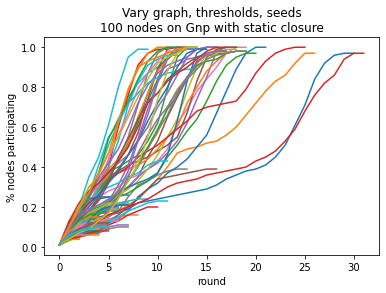

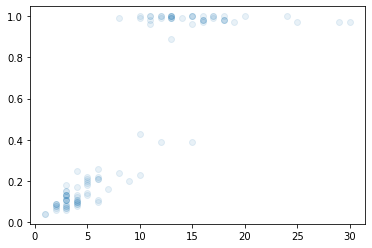

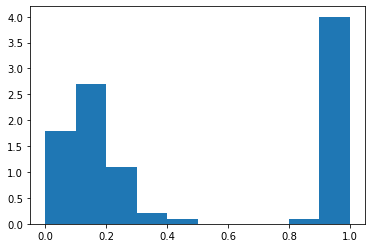

Now running simulation for closure_rate=5


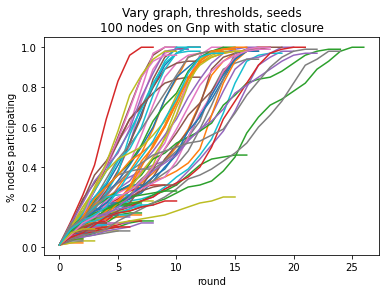

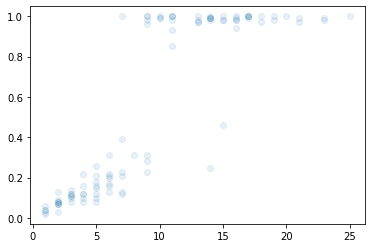

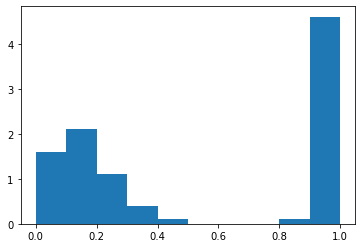

Now running simulation for closure_rate=10


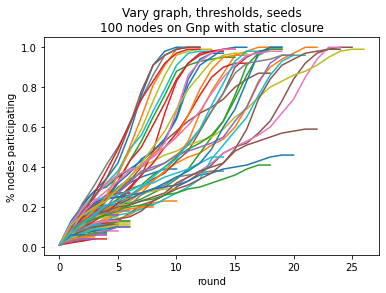

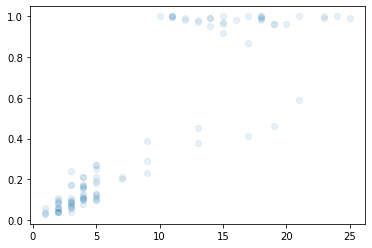

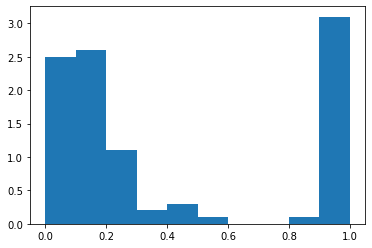

Now running simulation for closure_rate=15


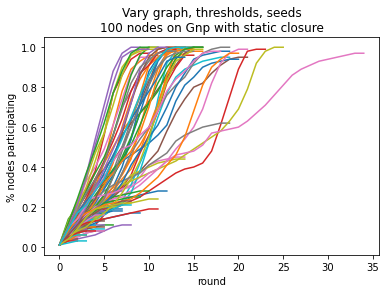

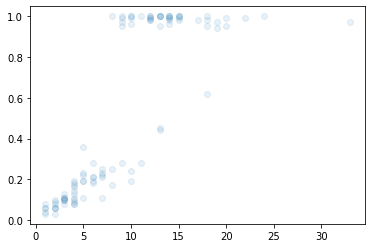

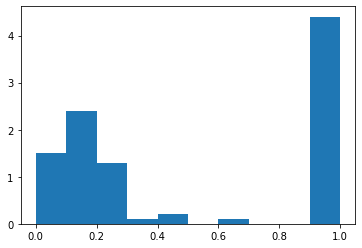

Now running simulation for closure_rate=20


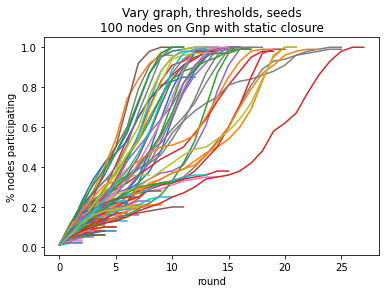

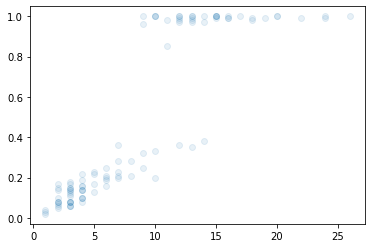

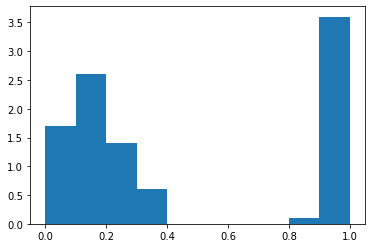

Now running simulation for closure_rate=25


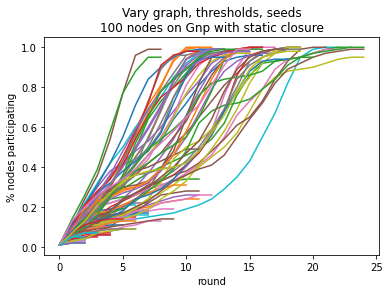

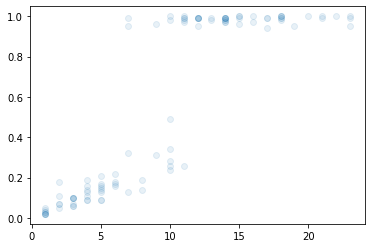

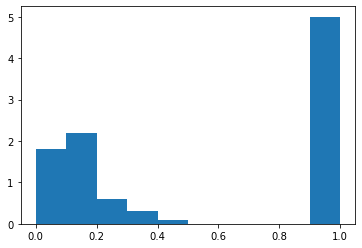

In [16]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][4] if use_network else 'population_irrelevant'
CLOSURE_RATE_LIST = [1, 5, 10, 15, 20, 25] # closure_rate = 1
max_rounds = 100

for closure_rate in CLOSURE_RATE_LIST:
    print(f'Now running simulation for closure_rate={closure_rate}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_closure{closure_rate}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelstatic_closure{closure_rate}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (None/Population)

Now running simulation for closure_rate=1


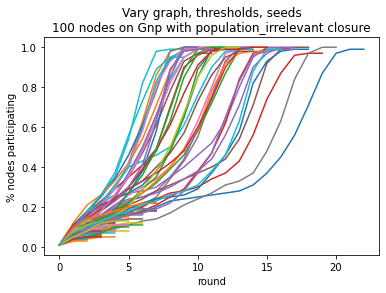

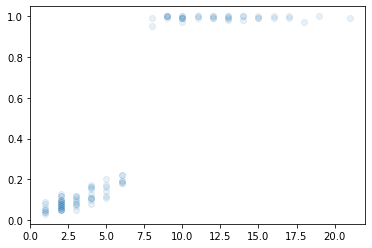

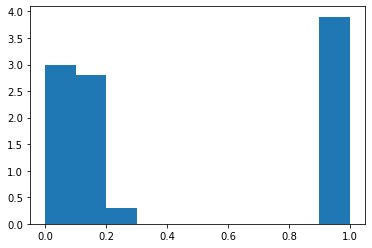

Now running simulation for closure_rate=5


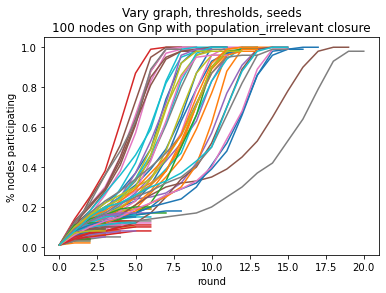

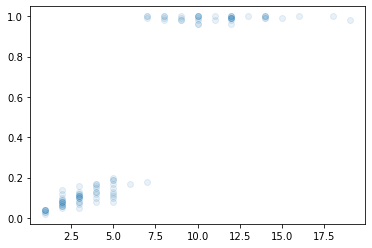

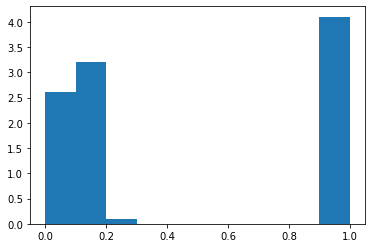

Now running simulation for closure_rate=10


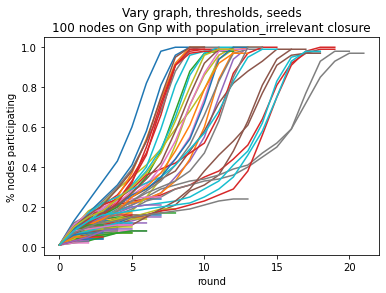

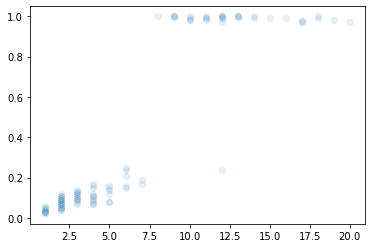

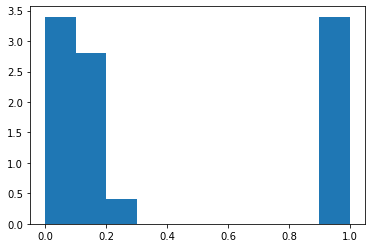

Now running simulation for closure_rate=15


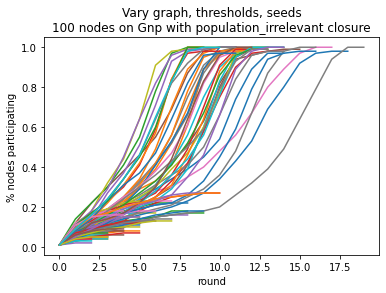

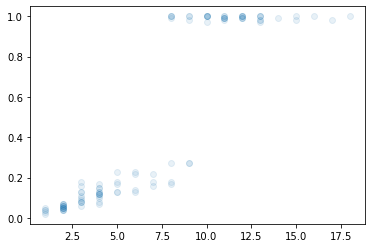

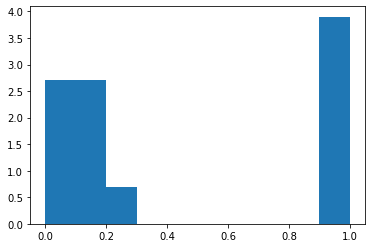

Now running simulation for closure_rate=20


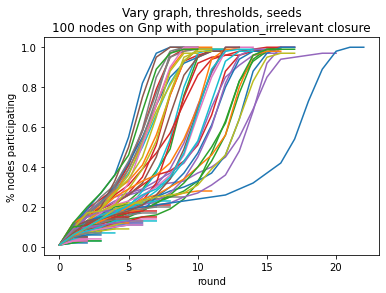

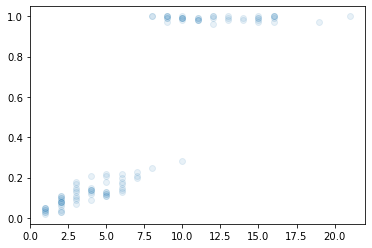

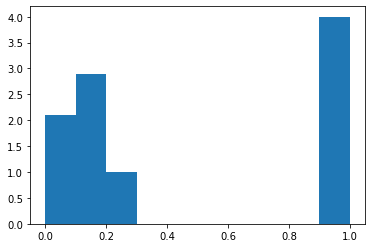

Now running simulation for closure_rate=25


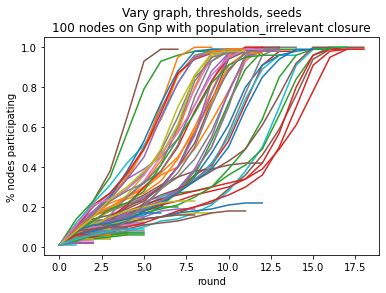

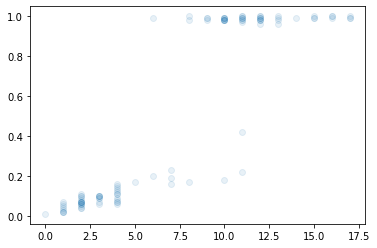

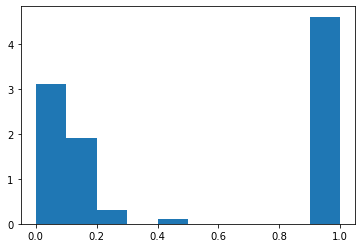

In [17]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = False
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][5] if use_network else 'population_irrelevant'
CLOSURE_RATE_LIST = [1, 5, 10, 15, 20, 25] # closure_rate = 1
max_rounds = 100

for closure_rate in CLOSURE_RATE_LIST:
    print(f'Now running simulation for closure_rate={closure_rate}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_closure{closure_rate}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelpop_closure{closure_rate}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

## IDENTICAL AS ABOVE Graph Threshold Seed settings ; Simulating with Closure (Random)

Now running simulation for closure_rate=1


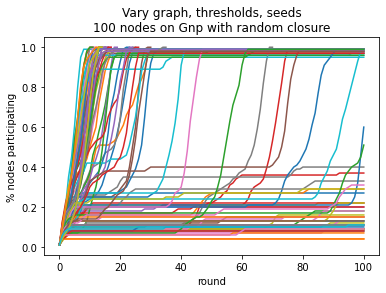

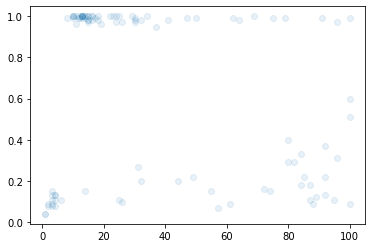

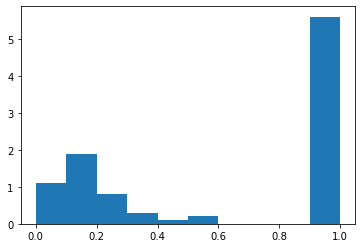

Now running simulation for closure_rate=5


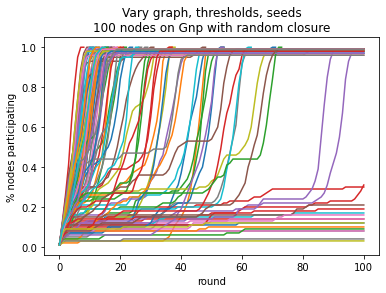

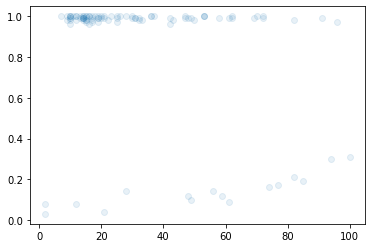

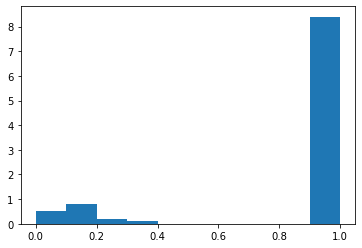

Now running simulation for closure_rate=10


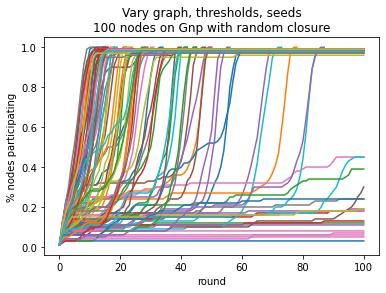

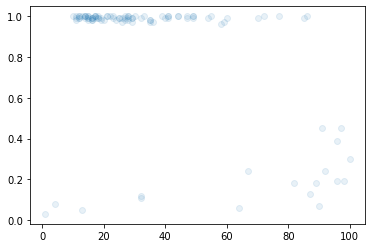

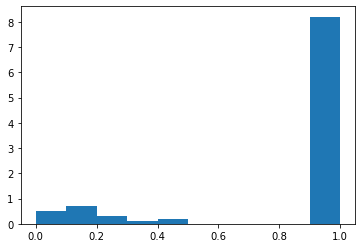

Now running simulation for closure_rate=15


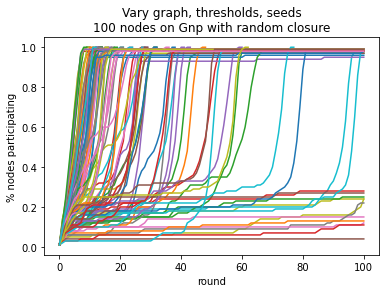

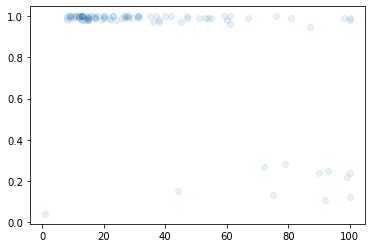

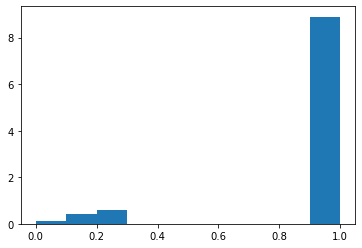

Now running simulation for closure_rate=20


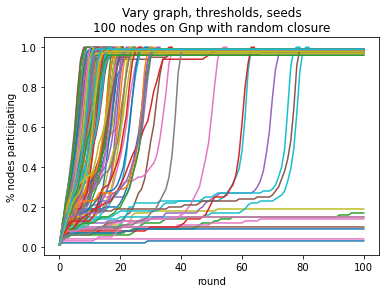

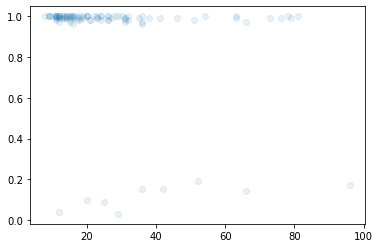

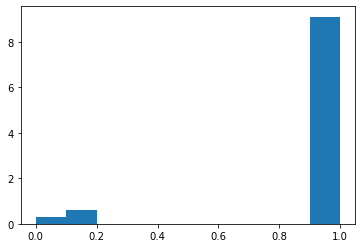

Now running simulation for closure_rate=25


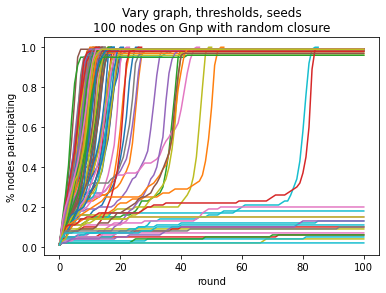

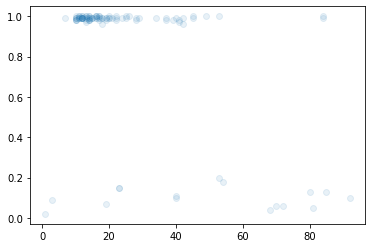

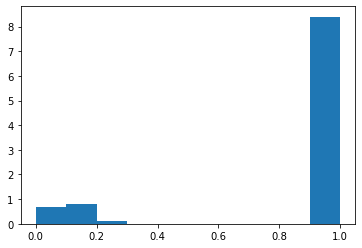

In [18]:
num_experiments = 100
# Graph hyperparameters
graph_type = ['Gnp', 'stochastic'][0]
num_nodes = 100
graph_params = {
    'Gnp':{'p':0.1}, 
    'stochastic':{'within_p':0.5,'between_p':0.01}
}[graph_type]
# Threshold hyperparameters
threshold_mean = 0.4
threshold_var = 0.25
# Seed selection hyperparameters
seed_candidates = np.arange(num_nodes)
num_seeds = 1
# Simulation hyperparameters
use_network = True
sticky_cascade = True
closure_method = [
    'max', 
    'squared_weighted_random', 'weighted_random', 'random', 
    'static'
][3] if use_network else 'population_irrelevant'
CLOSURE_RATE_LIST = [1, 5, 10, 15, 20, 25] # closure_rate = 1
max_rounds = 100

for closure_rate in CLOSURE_RATE_LIST:
    print(f'Now running simulation for closure_rate={closure_rate}')

    # Retrieve output from before
    (sim_log, rounds_filled, rounds_frozen, max_size_round, sizes_round) = pickle.load(
        open(f'e1_hyperparam/gnp_modelmax_closure{closure_rate}.pkl', 'rb')
    )
    
    rounds_filled, rounds_frozen, max_size_round, sizes_round = run_identicalsrc_simulations(
        sim_log,
        num_experiments, graph_type, num_nodes, graph_params, 
        threshold_mean, threshold_var, seed_candidates, num_seeds, 
        use_network, sticky_cascade, closure_method, closure_rate, 
        max_rounds, save_path=f'e1_hyperparam/gnp_modelrandom_closure{closure_rate}.pkl', 
        use_simlog_graph=True, use_simlog_thresholds=True, use_simlog_seeds=True
    )

    # print(rounds_filled)
    # print(rounds_frozen)
    # print(max_size_round)

    _ = plt.scatter(
        max_size_round,
        [r[-1] for r in sizes_round],
        alpha=0.1,
    )
    plt.show()

    _ = plt.hist([r[-1] for r in sizes_round], range=(0,1), bins=10, density=True)
    plt.show()

# Data vis will be computed elsewhere